In [1]:
!pip install chardet
!pip install dash
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chardet
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dash
from dash import dcc
from dash import html 
from dash.dependencies import Input, Output

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 6.7 MB/s eta 0:00:0000:0100:01


In [74]:
with open('Most Streamed Spotify Songs 2024.csv', 'rb') as file:
    data = file.read(100000)
    result = chardet.detect(data)
    encoding = result['encoding']
    print(f"Detected encoding: {encoding}")

Detected encoding: ISO-8859-1


In [75]:
df=pd.read_csv('Most Streamed Spotify Songs 2024.csv',encoding="ISO-8859-1")

In [76]:
pd.set_option('display.max_columns',85)

In [77]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","150,597,040",210.0,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","156,380,351",188.0,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","373,784,955",190.0,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582",394.0,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",NaN,NaN,"112,763,851",182.0,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [78]:
df.tail()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",71.0,"149,247,747","1,397,590","48,370","20,202,000","143,934,379","53,016",3.0,6,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",56.0,"943,920,245","5,347,766",NaN,"1,721","19,935","24,973,048",1.0,412,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",65.0,"201,027,333","1,081,402","7,596","5,288,677","36,849,005","29,253,152",19.0,204,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",66.0,"1,118,595,159","3,868,828","11,433","2,534,831","37,757,301","25,150,516",1.0,"1,200",NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0
4599,Me Acostumbre (feat. Bad Bunny),Me Acostumbre (feat. Bad Bunny),Arcï¿½ï¿½,4/11/2017,USB271700107,"4,593",19.4,"255,740,653","32,138","14,066,526",64.0,"866,300,755","3,826,829","78,000","10,055,461","70,196,388","175,831,376",11.0,"2,083",NaN,4.0,"127,479",4.0,"69,006,739","11,320",NaN,"767,006",NaN,1


In [79]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [80]:
df.drop(columns=['Soundcloud Streams','TIDAL Popularity'], axis=1,inplace=True)

In [81]:
df = df.map(lambda x: x.replace(',','') if isinstance(x,str) else x)

In [82]:
for x in df.columns[6:]:
    df[x] = pd.to_numeric(df[x])
    print(df[x].dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int64


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                3427 

In [84]:
df

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09,1.505970e+08,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08,1.563804e+08,188.0,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,1118279.0,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09,3.737850e+08,190.0,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,5285340.0,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,3.351189e+09,394.0,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,11822942.0,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,NaN,NaN,1.127639e+08,182.0,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,457017.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,4585,19.4,3.050500e+08,65770.0,5103054.0,71.0,1.492477e+08,1397590.0,48370.0,2.020200e+07,1.439344e+08,5.301600e+04,3.0,6.0,NaN,2.0,14217.0,NaN,20104066.0,13184.0,656337.0,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,4575,19.4,5.228236e+07,4602.0,1449767.0,56.0,9.439202e+08,5347766.0,NaN,1.721000e+03,1.993500e+04,2.497305e+07,1.0,412.0,NaN,1.0,927.0,NaN,NaN,NaN,193590.0,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,4571,19.4,1.899727e+08,72066.0,6704802.0,65.0,2.010273e+08,1081402.0,7596.0,5.288677e+06,3.684900e+07,2.925315e+07,19.0,204.0,NaN,1.0,74.0,6.0,84426740.0,28999.0,1135998.0,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,4591,19.4,1.454670e+08,14037.0,7387064.0,66.0,1.118595e+09,3868828.0,11433.0,2.534831e+06,3.775730e+07,2.515052e+07,1.0,1200.0,NaN,NaN,NaN,7.0,6817840.0,NaN,448292.0,0


In [85]:
df['Track'] = df['Track'].apply(lambda x: x[:20] + '...' if len(x) > 30 else x)

In [86]:
df

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09,1.505970e+08,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08,1.563804e+08,188.0,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,1118279.0,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09,3.737850e+08,190.0,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,5285340.0,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,3.351189e+09,394.0,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,11822942.0,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,NaN,NaN,1.127639e+08,182.0,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,457017.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,4585,19.4,3.050500e+08,65770.0,5103054.0,71.0,1.492477e+08,1397590.0,48370.0,2.020200e+07,1.439344e+08,5.301600e+04,3.0,6.0,NaN,2.0,14217.0,NaN,20104066.0,13184.0,656337.0,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,4575,19.4,5.228236e+07,4602.0,1449767.0,56.0,9.439202e+08,5347766.0,NaN,1.721000e+03,1.993500e+04,2.497305e+07,1.0,412.0,NaN,1.0,927.0,NaN,NaN,NaN,193590.0,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,4571,19.4,1.899727e+08,72066.0,6704802.0,65.0,2.010273e+08,1081402.0,7596.0,5.288677e+06,3.684900e+07,2.925315e+07,19.0,204.0,NaN,1.0,74.0,6.0,84426740.0,28999.0,1135998.0,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,4591,19.4,1.454670e+08,14037.0,7387064.0,66.0,1.118595e+09,3868828.0,11433.0,2.534831e+06,3.775730e+07,2.515052e+07,1.0,1200.0,NaN,NaN,NaN,7.0,6817840.0,NaN,448292.0,0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                3427 

In [88]:
transDf = df.set_index('Track').transpose()

In [89]:
# def mape(x):
#     return 'Explicit' if x==1 else 'Not Explicit'
# df['Explicit Track'] = df['Explicit Track'].apply(mape)
# df = df.loc[df['Track'].shift(-1) != df['Track']]

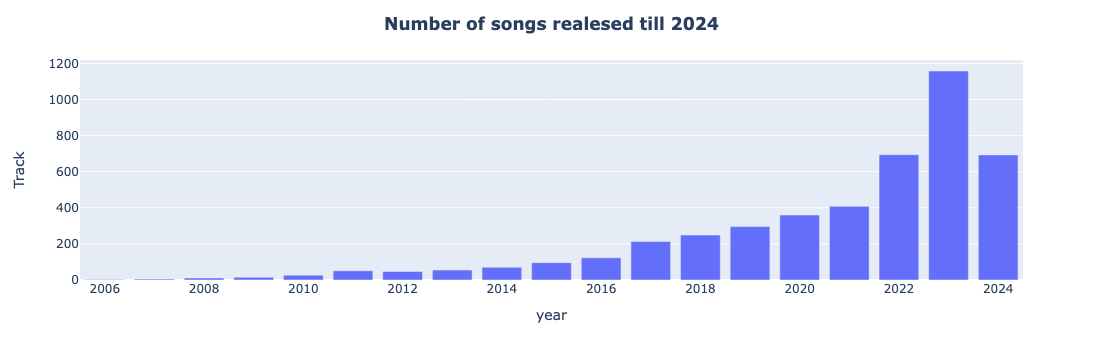

In [90]:
df['Release Date'] = pd.to_datetime(df['Release Date'],format='%m/%d/%Y')
df['year'] = df['Release Date'].dt.year
timedf = df.groupby('year')['Track'].size().reset_index()
fig1 =px.bar(timedf[timedf['year']>2005],x='year',y='Track')
fig1.update_layout(title_text = '<b>Number of songs realesed till 2024</b>',title_x=0.5)

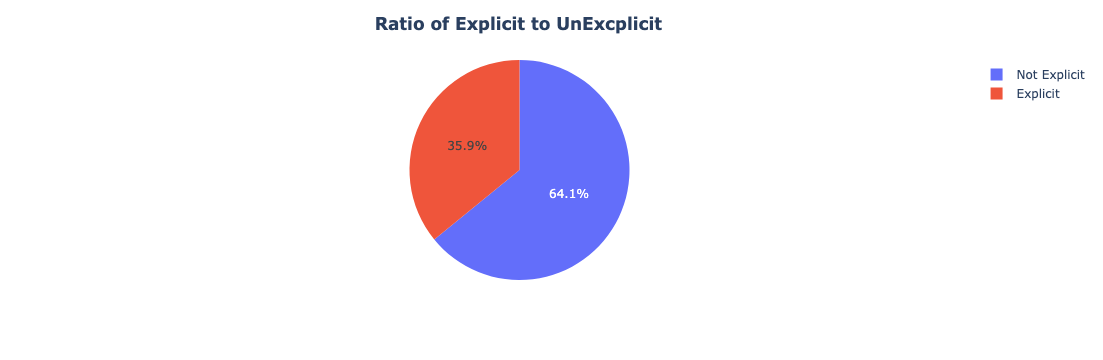

In [91]:
dff =df.copy()
dff['Explicit Track'] = dff['Explicit Track'].replace({0: 'Not Explicit', 1: 'Explicit'})
pie = px.pie(dff,names='Explicit Track')
pie.update_layout(title_text='<b>Ratio of Explicit to UnExcplicit<b>',title_x=0.47)

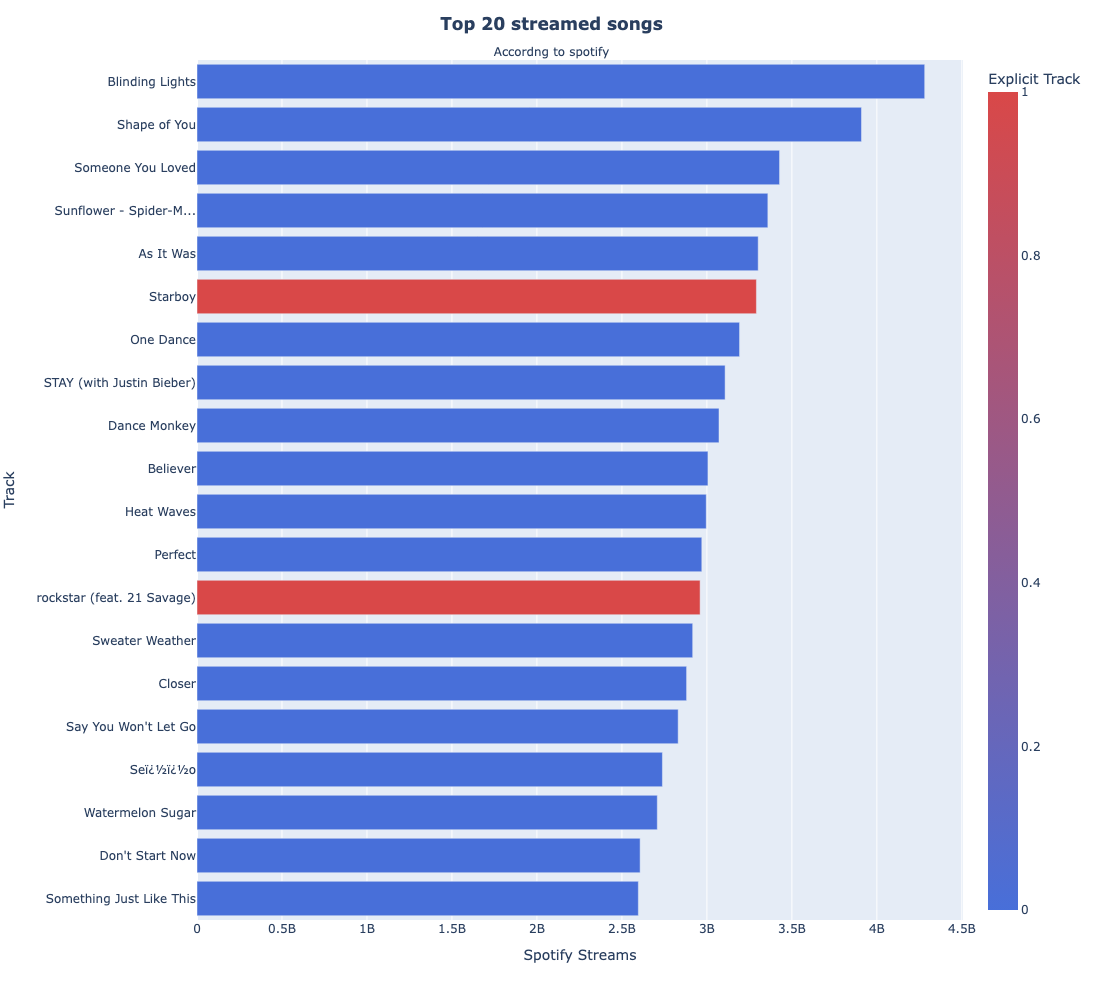

In [92]:
spstream = df.copy()
spstream.sort_values(by='Spotify Streams',ascending =False,inplace = True)
spstream =spstream.loc[spstream['Track'].shift() != spstream['Track']]
fig = px.bar(spstream.head(20)[::-1],y = 'Track',x='Spotify Streams',color = 'Explicit Track',
             height=1000,color_continuous_scale=['#486fd9','#d94848'])
fig.update_layout(showlegend=True,title_text='<b>Top 20 streamed songs</b><br><sub>Accordng to spotify</sub><br>', title_x=0.5)
fig

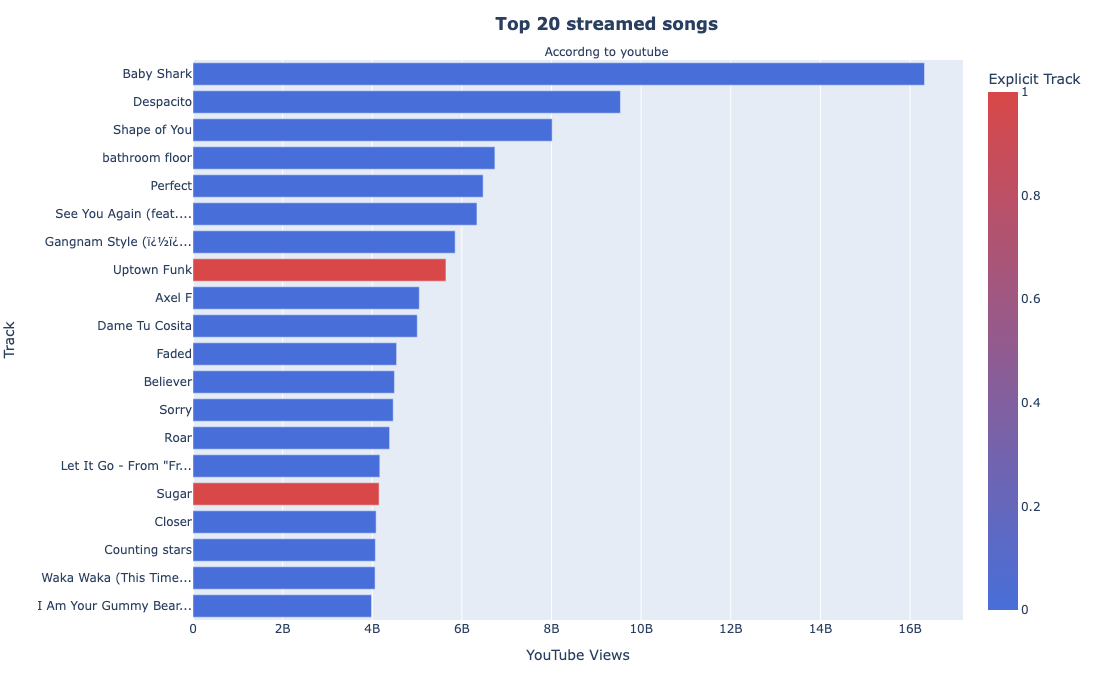

In [93]:
youstream = df.copy()
youstream.sort_values(by='YouTube Views',ascending =False,inplace = True)
youstream =youstream.loc[youstream['Track'].shift() != youstream['Track']]
fig = px.bar(youstream.head(20)[::-1],y = 'Track',x='YouTube Views',color = 'Explicit Track',
             height=700,width=1000,color_continuous_scale=['#486fd9','#d94848'],
            labels=['Exceplicit','Not'],hover_data=['YouTube Likes'])
fig. update_coloraxes(showscale=True)
fig.update_layout(showlegend=True,title_text='<b>Top 20 streamed songs</b><br><sub>Accordng to youtube</sub><br>', title_x=0.55)

fig

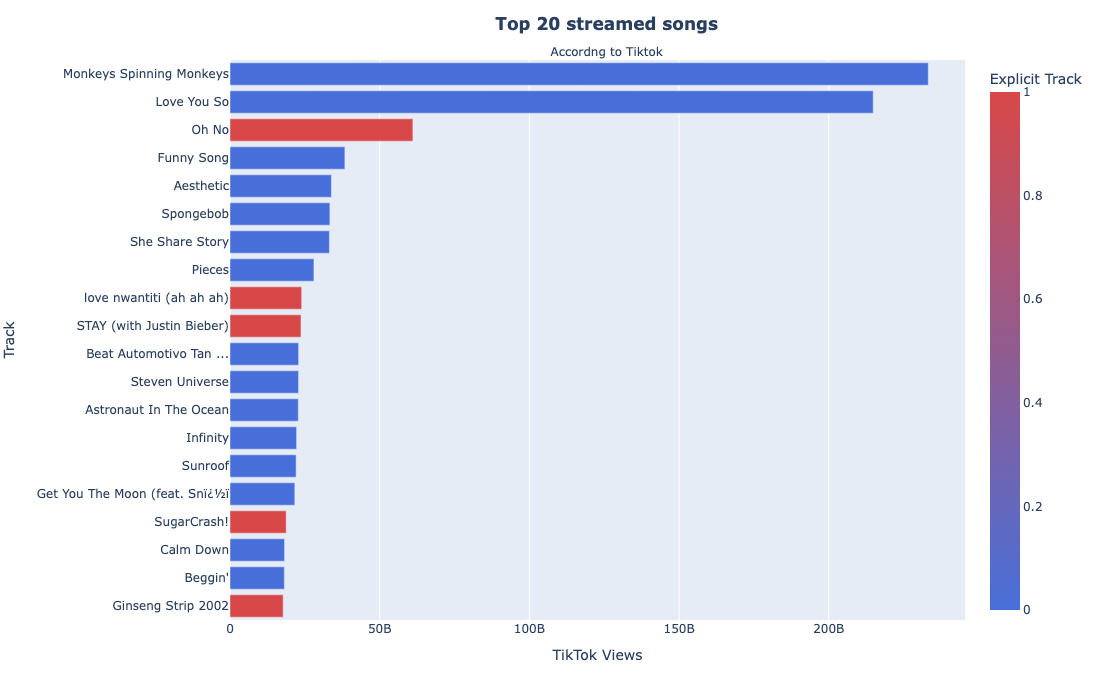

In [94]:
tikstream = df.copy()
tikstream.sort_values(by='TikTok Views',ascending =False,inplace = True)
tikstream =tikstream.loc[tikstream['Track'].shift() != tikstream['Track']]
fig = px.bar(tikstream.head(20)[::-1],y = 'Track',x='TikTok Views',color = 'Explicit Track',
             height=700,width=1000,color_continuous_scale=['#486fd9','#d94848'],
            labels=['Exceplicit','Not'])
fig. update_coloraxes(showscale=True)
fig.update_layout(showlegend=True,title_text='<b>Top 20 streamed songs</b><br><sub>Accordng to Tiktok</sub><br>', title_x=0.55)

fig

In [95]:
df['totalView'] = df['Spotify Streams'].fillna(0)+df['YouTube Views'].fillna(0)

In [96]:
artistdf = df.groupby('Artist')
totalV = artistdf['Spotify Streams'].sum().reset_index()
totalV.sort_values(by='Spotify Streams',ascending=False,inplace = True)

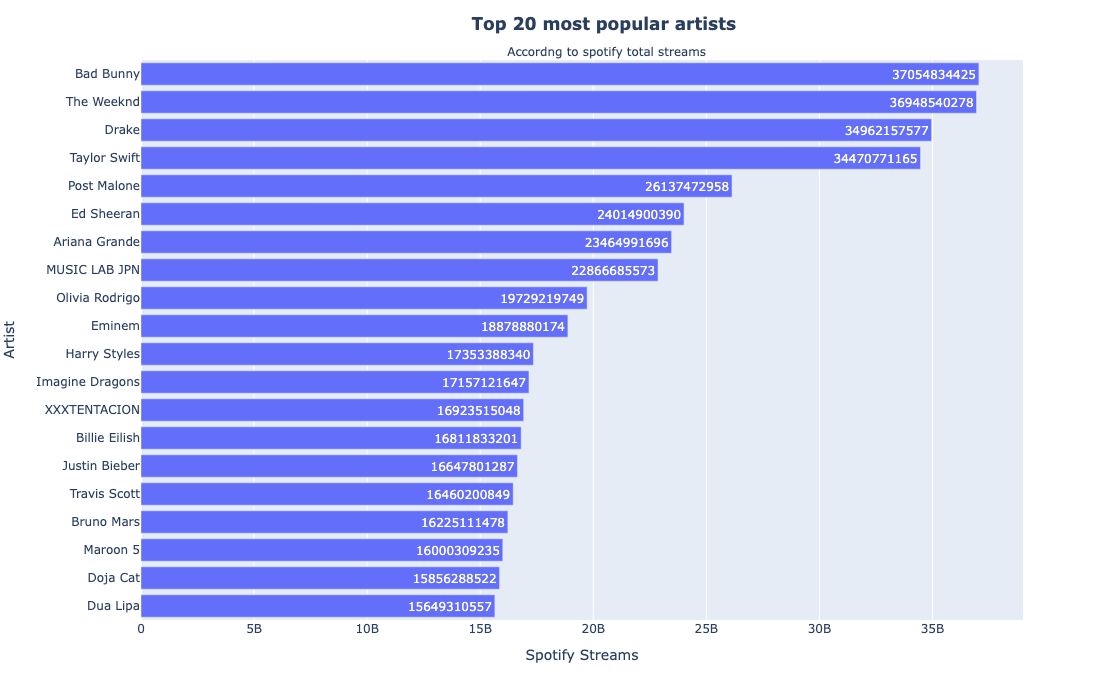

In [97]:
fig = px.bar(totalV.head(20)[::-1],y = 'Artist',x='Spotify Streams',
             height=700,width=1000,text_auto='Spotify Streams')
fig.update_layout(showlegend=True,title_text='<b>Top 20 most popular artists </b><br><sub>Accordng to spotify total streams</sub><br>', title_x=0.55)
fig

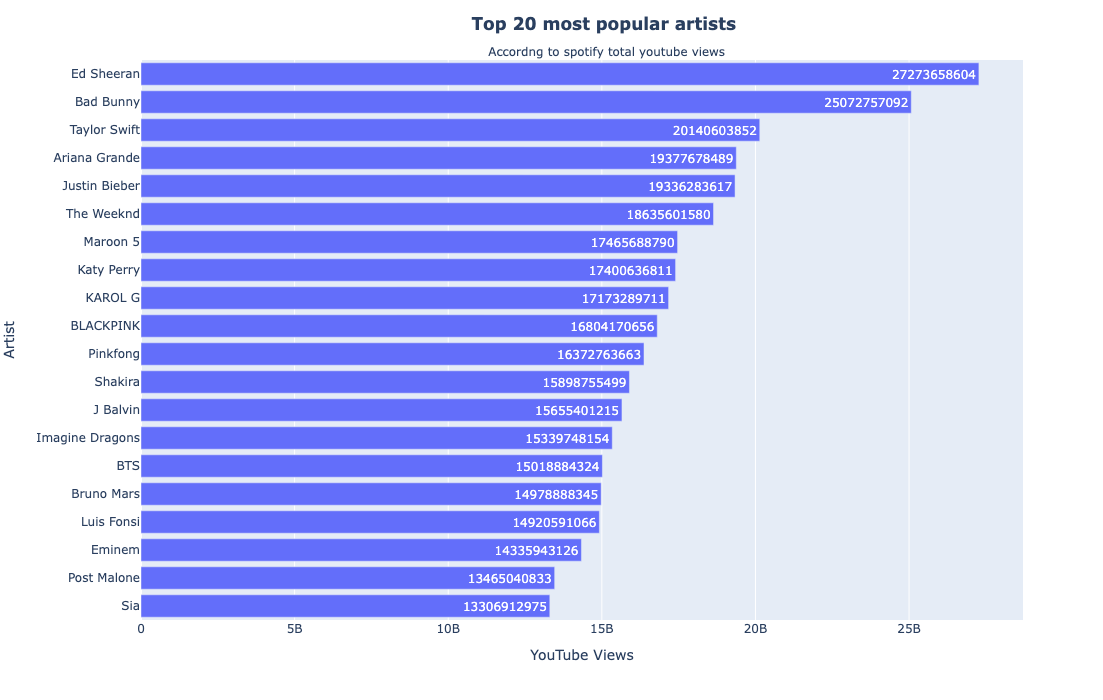

In [98]:
totalV = artistdf['YouTube Views'].sum().reset_index()
totalV.sort_values(by='YouTube Views',ascending=False,inplace = True)
fig = px.bar(totalV.head(20)[::-1],y = 'Artist',x='YouTube Views',
             height=700,width=1000,text_auto='YouTube Views')
fig.update_layout(showlegend=True,title_text='<b>Top 20 most popular artists </b><br><sub>Accordng to spotify total youtube views</sub><br>', title_x=0.55)
fig

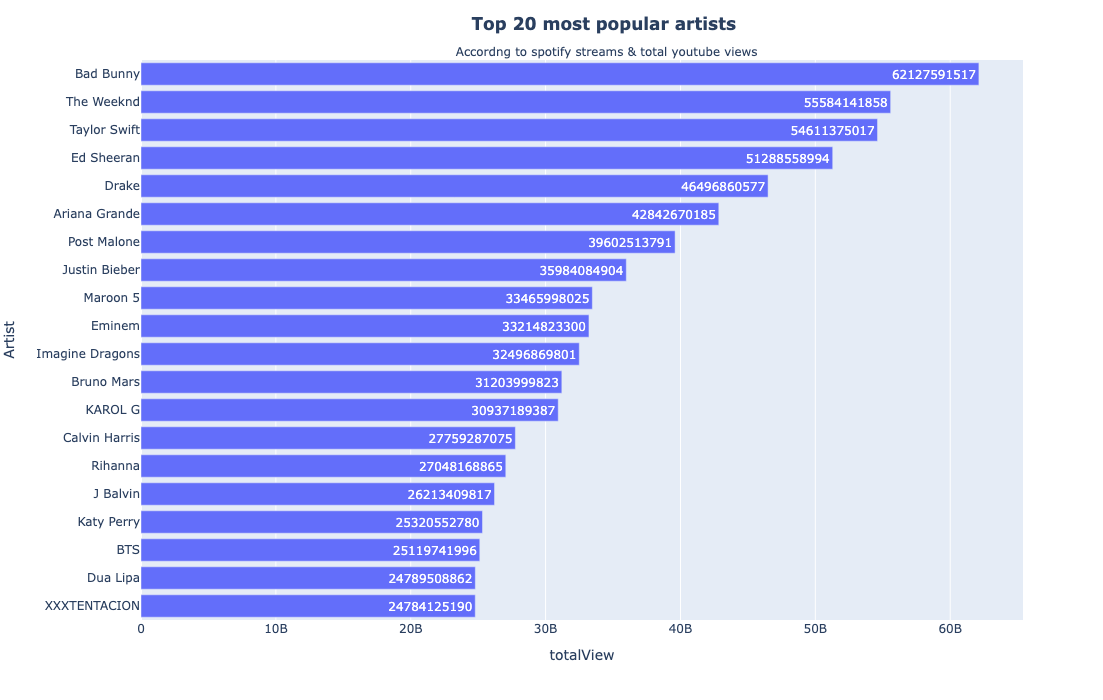

In [99]:
totalV = artistdf['totalView'].sum().reset_index()
totalV.sort_values(by='totalView',ascending=False,inplace = True)
fig = px.bar(totalV.head(20)[::-1],y = 'Artist',x='totalView',
             height=700,width=1000,text_auto='totalView')
fig.update_layout(showlegend=True,title_text='<b>Top 20 most popular artists </b><br><sub>Accordng to spotify streams & total youtube views</sub><br>', title_x=0.55)
fig

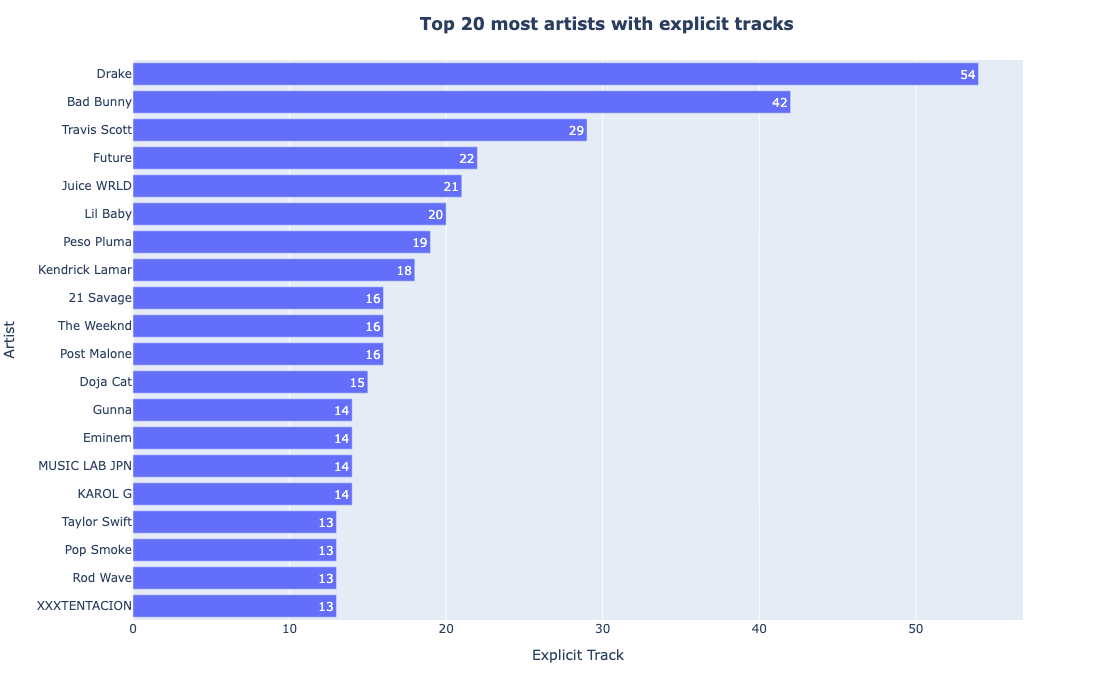

In [100]:
artistEx = df.groupby('Artist')
artistEx = artistEx['Explicit Track'].sum().reset_index()
artistEx.sort_values(by='Explicit Track',ascending=False,inplace = True)
fig = px.bar(artistEx.head(20)[::-1],y = 'Artist',x='Explicit Track',
             height=700,width=1000,text_auto='totalView')
fig.update_layout(showlegend=True,title_text='<b>Top 20 most artists with explicit tracks</b>', title_x=0.55)
fig

In [101]:
df

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track,year,totalView
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09,1.505970e+08,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0,2024,4.747457e+08
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08,1.563804e+08,188.0,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,1118279.0,1,2024,4.400509e+08
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09,3.737850e+08,190.0,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,5285340.0,0,2024,7.239084e+08
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,3.351189e+09,394.0,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,11822942.0,0,2023,3.127382e+09
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,NaN,NaN,1.127639e+08,182.0,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,457017.0,1,2024,1.844089e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585,19.4,3.050500e+08,65770.0,5103054.0,71.0,1.492477e+08,1397590.0,48370.0,2.020200e+07,1.439344e+08,5.301600e+04,3.0,6.0,NaN,2.0,14217.0,NaN,20104066.0,13184.0,656337.0,1,2017,4.542977e+08
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575,19.4,5.228236e+07,4602.0,1449767.0,56.0,9.439202e+08,5347766.0,NaN,1.721000e+03,1.993500e+04,2.497305e+07,1.0,412.0,NaN,1.0,927.0,NaN,NaN,NaN,193590.0,0,2018,9.962026e+08
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571,19.4,1.899727e+08,72066.0,6704802.0,65.0,2.010273e+08,1081402.0,7596.0,5.288677e+06,3.684900e+07,2.925315e+07,19.0,204.0,NaN,1.0,74.0,6.0,84426740.0,28999.0,1135998.0,1,2020,3.910000e+08
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591,19.4,1.454670e+08,14037.0,7387064.0,66.0,1.118595e+09,3868828.0,11433.0,2.534831e+06,3.775730e+07,2.515052e+07,1.0,1200.0,NaN,NaN,NaN,7.0,6817840.0,NaN,448292.0,0,2016,1.264062e+09


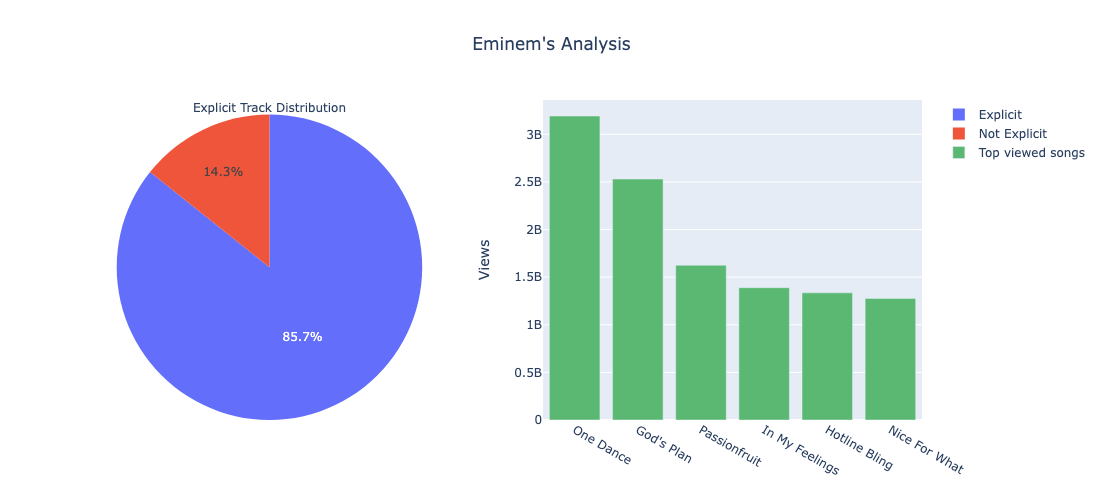

In [102]:
artistAnalysis = df.copy()
artistAnalysis =artistAnalysis[artistAnalysis['Artist'] == 'Drake']
artistAnalysis['Explicit Track'] = artistAnalysis['Explicit Track'].replace({0:'Not Explicit',1:'Explicit'})
topsongs = artistAnalysis.sort_values(by='Spotify Streams', ascending=False)
topsongs = topsongs.loc[topsongs['Track'].shift() != topsongs['Track']]
fig = make_subplots(rows=1,cols=2,specs=[[{"type": "pie"}, {"type": "bar"}]])
pie = go.Pie(labels=artistAnalysis["Explicit Track"], title='Explicit Track Distribution<br>')
bar = go.Bar(x=topsongs['Track'][:6],y=topsongs['Spotify Streams'],marker_color='#5ab873',name='Top viewed songs')
fig.add_trace(pie,row=1,col=1)
fig.add_trace(bar,row=1,col=2)
fig.update_layout(height=500, width=1000, title_text="Eminem's Analysis",title_x=0.5)
fig.update_yaxes(title_text="Views", row=1, col=2)
fig.show()

In [104]:
app = dash.Dash('__name__')
artistAnalysis = df.copy()
app.layout = html.Div(children=[
html.H1('Population of the country over the years' , style={'text-align':'center','color':'#303030','font-family': 'Arial, Helvetica, sans-serif'}),
html.Div([
dcc.Dropdown(id = 'artist',options=[{'label':html.Span([x], style={'color': '#303030', 'font-family': 'Arial, Helvetica, sans-serif'}),'value':x} for x in artistAnalysis ['Artist'].astype('str').unique()],
                                     value='Eminem',placeholder="Select an Artist",
                                     multi=False)],style={'width':'100%','border-radius': '10px'}),
    dcc.Graph(id='figg',figure={},style={'width':'100%'}),
])
@app.callback(
Output(component_id='figg',component_property='figure'),
Input(component_id='artist',component_property='value')

)
def update(op):
    fil =artistAnalysis[artistAnalysis['Artist'] == op]
    fil['Explicit Track'] = artistAnalysis['Explicit Track'].replace({0:'Not Explicit',1:'Explicit'})
    filtopsongs = fil.sort_values(by='Spotify Streams', ascending=False)
    filtopsongs = filtopsongs.loc[filtopsongs['Track'].shift() != filtopsongs['Track']]
    fig = make_subplots(rows=1,cols=2,specs=[[{"type": "pie"}, {"type": "bar"}]])
    pie = go.Pie(labels=fil["Explicit Track"], title='Explicit Track Distribution<br>')
    bar = go.Bar(x=filtopsongs['Track'][:6],y=filtopsongs['Spotify Streams'],marker_color='#5ab873',name='Top viewed songs',hovertext=filtopsongs['Explicit Track'])
    fig.add_trace(pie,row=1,col=1)
    fig.add_trace(bar,row=1,col=2)
    fig.update_layout(height=500, width=1000, title_text=f"{op}'s Analysis",title_x=0.5)
    fig.update_yaxes(title_text="Views", row=1, col=2)
    return fig
app.run_server(mode='inline')

/var/folders/0w/c9d20c252238nzvpsjc4y2tr0000gn/T/ipykernel_3044/1093244906.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

